***Challenge 1***
Gabriel

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import datetime as dt, timedelta
%matplotlib inline

***Exercise 1.1***

Open up a new Jupyter notebook
Download a few MTA turnstile data files
Open up a file, use csv reader to read it, make a python dict where there is a key for each (C/A, UNIT, SCP, STATION). These are the first four columns. The value for this key should be a list of lists. Each list in the list is the rest of the columns in a row. For example, one key-value pair should look like
{ ('A002','R051','02-00-00','LEXINGTON AVE'): [ ['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'], ['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'], ['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'], ... ] }

In [2]:
def list_weeks(date1, date2):
    """
    Creates a list of weeks between two input dates not inclusive of date2
    """
    date_diff=int(((date2-date1).days)/7)
    week_list=[]
    one_week = timedelta(days=7)
    for week in range(date_diff+1):
        week_list.append(date1)
        date1 += one_week
    clean_weeks = [i.strftime('%y%m%d') for i in week_list]
    return clean_weeks

In [3]:
# Define range of data to be taken and create list of weeks
date2 = dt(2019, 6, 22)
date1 = dt(2019, 6, 1)

week_list = list_weeks(date1, date2)

In [4]:
def import_weeks(week_list):
    """
    Creates mta_df from MTA data for the weeks specified in the input list
    """
    partial_link = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_'
    mta_df = pd.DataFrame()
    for i, date in enumerate(week_list):
        #if i == 0:
        #    mta_df=pd.read_csv(partial_link + date + '.txt')
        #else:
        new_mta=pd.read_csv(partial_link + date + '.txt')
        mta_df = pd.concat([mta_df, new_mta])
    return mta_df

In [5]:
turnstiles_df = import_weeks(week_list)

In [6]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,7071830,2396411
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,7071844,2396415
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,7071864,2396443
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,7071943,2396500
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,7072182,2396555


In [7]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [8]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]

In [9]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [10]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,7071830,2396411
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,7071844,2396415
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,7071864,2396443
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,7071943,2396500
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,7072182,2396555


In [11]:
turnstiles_df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
207472,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/21/2019,05:00:00,REGULAR,5554,379
207473,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/21/2019,09:00:00,REGULAR,5554,379
207474,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/21/2019,13:00:00,REGULAR,5554,379
207475,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/21/2019,17:00:00,REGULAR,5554,379
207476,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/21/2019,21:00:00,REGULAR,5554,379


In [12]:
turnstiles_df.DATE.value_counts().sort_index()

05/25/2019    28855
05/26/2019    29063
05/27/2019    29068
05/28/2019    28873
05/29/2019    29095
05/30/2019    29190
05/31/2019    29651
06/01/2019    29066
06/02/2019    28968
06/03/2019    30022
06/04/2019    29513
06/05/2019    29484
06/06/2019    29213
06/07/2019    28745
06/08/2019    29030
06/09/2019    29133
06/10/2019    29351
06/11/2019    29113
06/12/2019    30023
06/13/2019    29276
06/14/2019    29008
06/15/2019    29605
06/16/2019    29322
06/17/2019    29421
06/18/2019    29599
06/19/2019    29614
06/20/2019    29556
06/21/2019    30360
Name: DATE, dtype: int64

***Exercise 1.2***

Let's turn this into a time series.

For each key (basically the control area, unit, device address and station of a specific turnstile), have a list again, but let the list be comprised of just the point in time and the count of entries.

This basically means keeping only the date, time, and entries fields in each list. You can convert the date and time into datetime objects -- That is a python class that represents a point in time. You can combine the date and time fields into a string and use the dateutil module to convert it into a datetime object. For an example check this StackOverflow question.

Your new dict should look something like

{ ('A002','R051','02-00-00','LEXINGTON AVE'): [ [datetime.datetime(2013, 3, 2, 3, 0), 3788], [datetime.datetime(2013, 3, 2, 7, 0), 2585], [datetime.datetime(2013, 3, 2, 12, 0), 10653], [datetime.datetime(2013, 3, 2, 17, 0), 11016], [datetime.datetime(2013, 3, 2, 23, 0), 10666], [datetime.datetime(2013, 3, 3, 3, 0), 10814], [datetime.datetime(2013, 3, 3, 7, 0), 10229], ... ], .... }

In [13]:
mask = ((turnstiles_df["C/A"] == "A002") & 
        (turnstiles_df["UNIT"] == "R051") & 
        (turnstiles_df["SCP"] == "02-00-00") & 
        (turnstiles_df["STATION"] == "59 ST"))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,7071830,2396411
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,7071844,2396415
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,7071864,2396443
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,7071943,2396500
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,7072182,2396555


In [14]:
# Take the date and time fields into a single datetime column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, format="%m/%d/%Y %H:%M:%S")

In [15]:
mask = ((turnstiles_df["C/A"] == "R626") & 
(turnstiles_df["UNIT"] == "R062") & 
(turnstiles_df["SCP"] == "00-00-00") & 
(turnstiles_df["STATION"] == "CROWN HTS-UTICA"))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
197070,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,05/25/2019,00:00:00,REGULAR,14769247,3248359,2019-05-25 00:00:00
197071,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,05/25/2019,04:00:00,REGULAR,14769264,3248387,2019-05-25 04:00:00
197072,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,05/25/2019,08:00:00,REGULAR,14769487,3248405,2019-05-25 08:00:00
197073,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,05/25/2019,12:00:00,REGULAR,14769895,3248445,2019-05-25 12:00:00
197074,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,05/25/2019,16:00:00,REGULAR,14770345,3248533,2019-05-25 16:00:00


In [16]:
# turnstiles_df = .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"]).ENTRIES.count().reset_index().sort_values("ENTRIES", ascending=False)

In [17]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(10)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
193647,N045,R187,01-00-00,81 ST-MUSEUM,2019-06-01 17:00:00,2
677709,R290,R161,00-00-00,KINGSBRIDGE RD,2019-06-07 05:00:00,2
193652,N045,R187,01-00-00,81 ST-MUSEUM,2019-06-02 17:00:00,2
581857,R174,R034,00-00-02,125 ST,2019-06-08 00:00:00,2
581688,R174,R034,00-00-01,125 ST,2019-06-08 00:00:00,2
193983,N045,R187,01-00-02,81 ST-MUSEUM,2019-06-02 17:00:00,2
193814,N045,R187,01-00-01,81 ST-MUSEUM,2019-06-01 17:00:00,2
582026,R174,R034,00-00-03,125 ST,2019-06-08 00:00:00,2
194150,N045,R187,01-06-00,81 ST-MUSEUM,2019-06-02 17:00:00,2
194072,N045,R187,01-00-02,81 ST-MUSEUM,2019-06-17 09:00:00,2


In [18]:
# On 6/1 and 6/2, we seem to have two entries for same time.  Let's take a look
mask = ((turnstiles_df["C/A"] == "N045") & 
(turnstiles_df["UNIT"] == "R187") & 
(turnstiles_df["SCP"] == "01-00-02") & 
(turnstiles_df["STATION"] == "81 ST-MUSEUM") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2019, 6, 1).date()))
turnstiles_df[mask].head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
48326,N045,R187,01-00-02,81 ST-MUSEUM,BC,IND,06/01/2019,01:00:00,REGULAR,4323386,989690,2019-06-01 01:00:00
48327,N045,R187,01-00-02,81 ST-MUSEUM,BC,IND,06/01/2019,05:00:00,REGULAR,4323388,989692,2019-06-01 05:00:00
48328,N045,R187,01-00-02,81 ST-MUSEUM,BC,IND,06/01/2019,09:00:00,REGULAR,4323394,989696,2019-06-01 09:00:00
48329,N045,R187,01-00-02,81 ST-MUSEUM,BC,IND,06/01/2019,13:00:00,REGULAR,4323510,989797,2019-06-01 13:00:00
48330,N045,R187,01-00-02,81 ST-MUSEUM,BC,IND,06/01/2019,17:00:00,REGULAR,4324002,989878,2019-06-01 17:00:00
48331,N045,R187,01-00-02,81 ST-MUSEUM,BC,IND,06/01/2019,17:00:00,RECOVR AUD,4323998,989878,2019-06-01 17:00:00
48332,N045,R187,01-00-02,81 ST-MUSEUM,BC,IND,06/01/2019,21:00:00,REGULAR,4324268,989897,2019-06-01 21:00:00


Looks to be a incorrect AUD entry. May be we should just select the Regular One.

In [20]:
turnstiles_df.DESC.value_counts()

REGULAR       818249
RECOVR AUD      2968
Name: DESC, dtype: int64

In [21]:
# Get rid of the duplicate entry
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [22]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-05-25 00:00:00,1
547474,R139,R031,04-00-01,34 ST-PENN STA,2019-05-26 20:00:00,1
547464,R139,R031,04-00-01,34 ST-PENN STA,2019-05-25 04:00:00,1
547465,R139,R031,04-00-01,34 ST-PENN STA,2019-05-25 08:00:00,1
547466,R139,R031,04-00-01,34 ST-PENN STA,2019-05-25 12:00:00,1


No more duplicate Entries

In [24]:
# Drop Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored
turnstiles_df = turnstiles_df.drop("DESC", axis=1, errors="ignore")

***Exercise 1.3***

These counts are for every n hours. (What is n?) We want total daily entries.  
Now make it that we again have the same keys, but now we have a single value for a single day, which is the total number of passengers that entered through this turnstile on this day.

In [25]:
turnstiles_daily = turnstiles_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"])['ENTRIES','EXITS'].first().reset_index()

In [26]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,05/25/2019,7072456,2396593
1,A002,R051,02-00-00,59 ST,05/26/2019,7073114,2396741
2,A002,R051,02-00-00,59 ST,05/27/2019,7073837,2396919
3,A002,R051,02-00-00,59 ST,05/28/2019,7075260,2397410
4,A002,R051,02-00-00,59 ST,05/29/2019,7076789,2397944


In [27]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES", "EXITS"]
                                                       .transform(lambda grp: grp.shift(1)))

In [28]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
0,A002,R051,02-00-00,59 ST,05/25/2019,7072456,2396593,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,05/26/2019,7073114,2396741,05/25/2019,7072456.0,2396593.0
2,A002,R051,02-00-00,59 ST,05/27/2019,7073837,2396919,05/26/2019,7073114.0,2396741.0
3,A002,R051,02-00-00,59 ST,05/28/2019,7075260,2397410,05/27/2019,7073837.0,2396919.0
4,A002,R051,02-00-00,59 ST,05/29/2019,7076789,2397944,05/28/2019,7075260.0,2397410.0


In [29]:
turnstiles_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
136023,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/17/2019,5554,379,06/16/2019,5554.0,379.0
136024,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/18/2019,5554,379,06/17/2019,5554.0,379.0
136025,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/19/2019,5554,379,06/18/2019,5554.0,379.0
136026,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/20/2019,5554,379,06/19/2019,5554.0,379.0
136027,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/21/2019,5554,379,06/20/2019,5554.0,379.0


In [30]:
# Drop the rows for last date
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [31]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
1,A002,R051,02-00-00,59 ST,05/26/2019,7073114,2396741,05/25/2019,7072456.0,2396593.0
2,A002,R051,02-00-00,59 ST,05/27/2019,7073837,2396919,05/26/2019,7073114.0,2396741.0
3,A002,R051,02-00-00,59 ST,05/28/2019,7075260,2397410,05/27/2019,7073837.0,2396919.0
4,A002,R051,02-00-00,59 ST,05/29/2019,7076789,2397944,05/28/2019,7075260.0,2397410.0
5,A002,R051,02-00-00,59 ST,05/30/2019,7078273,2398445,05/29/2019,7076789.0,2397944.0


In [32]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
2157,A025,R023,01-03-01,34 ST-HERALD SQ,05/26/2019,1238366337,1813314615,05/25/2019,1.238369e+09,1.813314e+09
2158,A025,R023,01-03-01,34 ST-HERALD SQ,05/27/2019,1238364310,1813315640,05/26/2019,1.238366e+09,1.813315e+09
2159,A025,R023,01-03-01,34 ST-HERALD SQ,05/28/2019,1238360334,1813317467,05/27/2019,1.238364e+09,1.813316e+09
2160,A025,R023,01-03-01,34 ST-HERALD SQ,05/29/2019,1238356306,1813319273,05/28/2019,1.238360e+09,1.813317e+09
2161,A025,R023,01-03-01,34 ST-HERALD SQ,05/30/2019,1238352363,1813321136,05/29/2019,1.238356e+09,1.813319e+09


In [33]:
# What's the deal with counter being in reverse
mask = ((turnstiles_df["C/A"] == "A025") & 
(turnstiles_df["UNIT"] == "R023") & 
(turnstiles_df["SCP"] == "01-03-01") & 
(turnstiles_df["STATION"] == "34 ST-HERALD SQ") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2019, 5, 25).date()))
turnstiles_df[mask].head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME
3263,A025,R023,01-03-01,34 ST-HERALD SQ,BDFMNQRW,BMT,05/25/2019,20:00:00,1238368540,1813313504,2019-05-25 20:00:00
3262,A025,R023,01-03-01,34 ST-HERALD SQ,BDFMNQRW,BMT,05/25/2019,16:00:00,1238369205,1813313102,2019-05-25 16:00:00
3261,A025,R023,01-03-01,34 ST-HERALD SQ,BDFMNQRW,BMT,05/25/2019,12:00:00,1238369659,1813312772,2019-05-25 12:00:00
3260,A025,R023,01-03-01,34 ST-HERALD SQ,BDFMNQRW,BMT,05/25/2019,08:00:00,1238369853,1813312551,2019-05-25 08:00:00
3259,A025,R023,01-03-01,34 ST-HERALD SQ,BDFMNQRW,BMT,05/25/2019,04:00:00,1238369928,1813312472,2019-05-25 04:00:00
3258,A025,R023,01-03-01,34 ST-HERALD SQ,BDFMNQRW,BMT,05/25/2019,00:00:00,1238370168,1813312454,2019-05-25 00:00:00


Counter in reverse!

In [34]:
(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
     .size())

C/A   UNIT  SCP       STATION        
A025  R023  01-03-01  34 ST-HERALD SQ    27
A037  R170  05-00-00  14 ST-UNION SQ      1
A043  R462  00-06-00  CANAL ST            1
A049  R088  02-05-00  CORTLANDT ST       24
A066  R118  00-00-00  CANAL ST           27
                                         ..
R610  R057  00-04-01  ATL AV-BARCLAY      1
R621  R060  00-03-01  EASTN PKWY-MUSM     2
R622  R123  00-00-00  FRANKLIN AV        27
R646  R110  01-00-01  FLATBUSH AV-B.C    27
R730  R431  00-00-04  EASTCHSTER/DYRE    27
Length: 416, dtype: int64

In [35]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        #print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
_ = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

In [36]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # May be counter is reversed?
        counter = -counter
    if counter > max_counter:
        # print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we are not giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

In [37]:
turnstiles_daily.head(10)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,05/26/2019,7073114,2396741,05/25/2019,7072456.0,2396593.0,658.0
2,A002,R051,02-00-00,59 ST,05/27/2019,7073837,2396919,05/26/2019,7073114.0,2396741.0,723.0
3,A002,R051,02-00-00,59 ST,05/28/2019,7075260,2397410,05/27/2019,7073837.0,2396919.0,1423.0
4,A002,R051,02-00-00,59 ST,05/29/2019,7076789,2397944,05/28/2019,7075260.0,2397410.0,1529.0
5,A002,R051,02-00-00,59 ST,05/30/2019,7078273,2398445,05/29/2019,7076789.0,2397944.0,1484.0
6,A002,R051,02-00-00,59 ST,05/31/2019,7079862,2398858,05/30/2019,7078273.0,2398445.0,1589.0
7,A002,R051,02-00-00,59 ST,06/01/2019,7080817,2399121,05/31/2019,7079862.0,2398858.0,955.0
8,A002,R051,02-00-00,59 ST,06/02/2019,7081567,2399319,06/01/2019,7080817.0,2399121.0,750.0
9,A002,R051,02-00-00,59 ST,06/03/2019,7082949,2399714,06/02/2019,7081567.0,2399319.0,1382.0
10,A002,R051,02-00-00,59 ST,06/04/2019,7084565,2400149,06/03/2019,7082949.0,2399714.0,1616.0


In [38]:
turnstiles_daily[turnstiles_daily.DAILY_ENTRIES==0].count()

C/A              12842
UNIT             12842
SCP              12842
STATION          12842
DATE             12842
ENTRIES          12842
EXITS            12842
PREV_DATE        12842
PREV_ENTRIES     12842
PREV_EXITS       12842
DAILY_ENTRIES    12842
dtype: int64

Now checking for the same issue with exits

In [40]:
turnstiles_daily[turnstiles_daily["EXITS"] < turnstiles_daily["PREV_EXITS"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES
3578,A037,R170,05-00-00,14 ST-UNION SQ,06/16/2019,617,151,06/15/2019,3124306.0,1.662547e+06,617.0
4516,A043,R462,00-06-00,CANAL ST,06/02/2019,458941,2,06/01/2019,950058.0,5.615030e+05,491117.0
7720,A069,R044,01-06-01,CHAMBERS ST,05/26/2019,744297601,1799810263,05/25/2019,744297438.0,1.799813e+09,163.0
7721,A069,R044,01-06-01,CHAMBERS ST,05/27/2019,744297739,1799807507,05/26/2019,744297601.0,1.799810e+09,138.0
7722,A069,R044,01-06-01,CHAMBERS ST,05/28/2019,744298374,1799803590,05/27/2019,744297739.0,1.799808e+09,635.0


In [41]:
# What's the deal with counter being in reverse
mask = ((turnstiles_df["C/A"] == "A037") & 
(turnstiles_df["UNIT"] == "R170") & 
(turnstiles_df["SCP"] == "05-00-00") & 
(turnstiles_df["STATION"] == "14 ST-UNION SQ") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2019, 6, 16).date()))
turnstiles_df[mask].head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME
5420,A037,R170,05-00-00,14 ST-UNION SQ,LNQR456W,BMT,06/16/2019,21:00:00,617,151,2019-06-16 21:00:00
5419,A037,R170,05-00-00,14 ST-UNION SQ,LNQR456W,BMT,06/16/2019,13:00:00,3125272,1663045,2019-06-16 13:00:00
5418,A037,R170,05-00-00,14 ST-UNION SQ,LNQR456W,BMT,06/16/2019,09:00:00,3125025,1662781,2019-06-16 09:00:00
5417,A037,R170,05-00-00,14 ST-UNION SQ,LNQR456W,BMT,06/16/2019,05:00:00,3124987,1662703,2019-06-16 05:00:00
5416,A037,R170,05-00-00,14 ST-UNION SQ,LNQR456W,BMT,06/16/2019,01:00:00,3124900,1662677,2019-06-16 01:00:00


In [42]:
(turnstiles_daily[turnstiles_daily["EXITS"] < turnstiles_daily["PREV_EXITS"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
     .size())

C/A   UNIT  SCP       STATION        
A037  R170  05-00-00  14 ST-UNION SQ      1
A043  R462  00-06-00  CANAL ST            1
A069  R044  01-06-01  CHAMBERS ST        27
B012  R196  00-00-00  PROSPECT PARK      27
B020  R263  00-03-00  AVENUE H            1
                                         ..
R523  R147  00-00-04  61 ST WOODSIDE     27
R610  R057  00-04-01  ATL AV-BARCLAY      1
R621  R060  00-03-01  EASTN PKWY-MUSM     2
R622  R123  00-00-00  FRANKLIN AV        27
R646  R110  01-00-01  FLATBUSH AV-B.C    27
Length: 416, dtype: int64

In [45]:
def get_daily_counts_exits(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["EXITS"], row["PREV_EXITS"])
    if counter > max_counter:
        # Check it again to make sure we are not giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
turnstiles_daily["DAILY_EXITS"] = turnstiles_daily.apply(get_daily_counts_exits, axis=1, max_counter=1000000)

In [46]:
turnstiles_daily.head(10)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS
1,A002,R051,02-00-00,59 ST,05/26/2019,7073114,2396741,05/25/2019,7072456.0,2396593.0,658.0,148.0
2,A002,R051,02-00-00,59 ST,05/27/2019,7073837,2396919,05/26/2019,7073114.0,2396741.0,723.0,178.0
3,A002,R051,02-00-00,59 ST,05/28/2019,7075260,2397410,05/27/2019,7073837.0,2396919.0,1423.0,491.0
4,A002,R051,02-00-00,59 ST,05/29/2019,7076789,2397944,05/28/2019,7075260.0,2397410.0,1529.0,534.0
5,A002,R051,02-00-00,59 ST,05/30/2019,7078273,2398445,05/29/2019,7076789.0,2397944.0,1484.0,501.0
6,A002,R051,02-00-00,59 ST,05/31/2019,7079862,2398858,05/30/2019,7078273.0,2398445.0,1589.0,413.0
7,A002,R051,02-00-00,59 ST,06/01/2019,7080817,2399121,05/31/2019,7079862.0,2398858.0,955.0,263.0
8,A002,R051,02-00-00,59 ST,06/02/2019,7081567,2399319,06/01/2019,7080817.0,2399121.0,750.0,198.0
9,A002,R051,02-00-00,59 ST,06/03/2019,7082949,2399714,06/02/2019,7081567.0,2399319.0,1382.0,395.0
10,A002,R051,02-00-00,59 ST,06/04/2019,7084565,2400149,06/03/2019,7082949.0,2399714.0,1616.0,435.0


Now create daily totaly foot traffic

In [47]:
turnstiles_daily['DAILY_TRAFFIC']=turnstiles_daily.DAILY_ENTRIES + turnstiles_daily.DAILY_EXITS

In [48]:
turnstiles_daily.head(10)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFFIC
1,A002,R051,02-00-00,59 ST,05/26/2019,7073114,2396741,05/25/2019,7072456.0,2396593.0,658.0,148.0,806.0
2,A002,R051,02-00-00,59 ST,05/27/2019,7073837,2396919,05/26/2019,7073114.0,2396741.0,723.0,178.0,901.0
3,A002,R051,02-00-00,59 ST,05/28/2019,7075260,2397410,05/27/2019,7073837.0,2396919.0,1423.0,491.0,1914.0
4,A002,R051,02-00-00,59 ST,05/29/2019,7076789,2397944,05/28/2019,7075260.0,2397410.0,1529.0,534.0,2063.0
5,A002,R051,02-00-00,59 ST,05/30/2019,7078273,2398445,05/29/2019,7076789.0,2397944.0,1484.0,501.0,1985.0
6,A002,R051,02-00-00,59 ST,05/31/2019,7079862,2398858,05/30/2019,7078273.0,2398445.0,1589.0,413.0,2002.0
7,A002,R051,02-00-00,59 ST,06/01/2019,7080817,2399121,05/31/2019,7079862.0,2398858.0,955.0,263.0,1218.0
8,A002,R051,02-00-00,59 ST,06/02/2019,7081567,2399319,06/01/2019,7080817.0,2399121.0,750.0,198.0,948.0
9,A002,R051,02-00-00,59 ST,06/03/2019,7082949,2399714,06/02/2019,7081567.0,2399319.0,1382.0,395.0,1777.0
10,A002,R051,02-00-00,59 ST,06/04/2019,7084565,2400149,06/03/2019,7082949.0,2399714.0,1616.0,435.0,2051.0


***Challenge 4***

We will plot the daily time series for a single turnstile.

Text(0, 0.5, 'Entries')

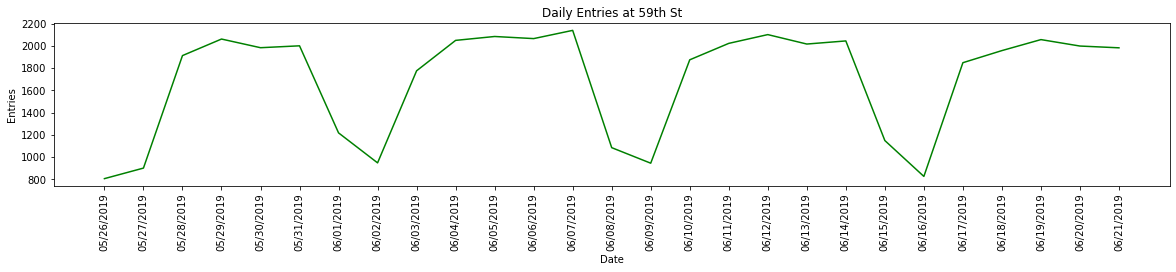

In [50]:
# Make a condition that selects one turnstile, and find daily sums for that turnstile
condition=(turnstiles_daily['C/A']=='A002') & (turnstiles_daily['UNIT']=='R051') & (turnstiles_daily['SCP']=='02-00-00') & (turnstiles_daily['STATION']=='59 ST')
daily_entries_df=turnstiles_daily[condition].groupby('DATE').DAILY_TRAFFIC.sum()

# Plot daily sums
plt.figure(figsize=(20,3))
plt.plot(daily_entries_df, c='g')
plt.title('Daily Entries at 59th St')
plt.xticks(rotation = 90);
plt.xlabel('Date')
plt.ylabel('Entries')

***Challenge 5***

So far we've been operating on a single turnstile level, let's combine turnstiles in the same ControlArea/Unit/Station combo. There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstiles-- same value for the C/A, UNIT and STATION columns, different values for the SCP column.
We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, sum the counts from each turnstile belonging to that combo. (hint: pd.groupby)

In [51]:
turnstiles_daily.groupby(['C/A','UNIT','STATION','DATE']).DAILY_TRAFFIC.sum()

C/A    UNIT  STATION        DATE      
A002   R051  59 ST          05/26/2019     9806.0
                            05/27/2019     9683.0
                            05/28/2019    20715.0
                            05/29/2019    22073.0
                            05/30/2019    22263.0
                                           ...   
TRAM2  R469  RIT-ROOSEVELT  06/17/2019     3372.0
                            06/18/2019     2445.0
                            06/19/2019     3007.0
                            06/20/2019     2911.0
                            06/21/2019     3264.0
Name: DAILY_TRAFFIC, Length: 20084, dtype: float64

***Challenge 6***

Similarly, combine everything in each station, and come up with daily time series for each STATION, by adding up all the turnstiles in a station.

In [52]:
station_series = pd.Series(turnstiles_daily.groupby(['STATION','DATE']).DAILY_TRAFFIC.sum())
station_series

STATION    DATE      
1 AV       05/26/2019    11770.0
           05/27/2019    11484.0
           05/28/2019    36555.0
           05/29/2019    41256.0
           05/30/2019    41330.0
                          ...   
ZEREGA AV  06/17/2019     5203.0
           06/18/2019     5342.0
           06/19/2019     5405.0
           06/20/2019     5342.0
           06/21/2019     5124.0
Name: DAILY_TRAFFIC, Length: 10195, dtype: float64

In [53]:
turnstiles_daily.DAILY_TRAFFIC.sort_values()

136027          0.0
69955           0.0
69953           0.0
69951           0.0
69950           0.0
            ...    
78746     1484537.0
42063     1563708.0
78593     1582233.0
79490     1582235.0
79630     1736861.0
Name: DAILY_TRAFFIC, Length: 131143, dtype: float64

We found what seem to be really high outlightliers in the daily traffic per station values. Here is our fix (replacing values 2 std deviations away from the mean with the mean on a station by station basis)

In [55]:
def replace(group):
    """
    Within each group, replaces outliers more than 2 standard deviations from the group with the group mean
    """
    mean, std = group.mean(), group.std()
    outliers = (group - mean).abs() > 2*std
    group[outliers] = mean        # or "group[~outliers].mean()"
    return group

outliers_removed = turnstiles_daily.groupby('STATION').transform(replace)

In [56]:
turnstiles_daily['DAILY_TRAFFIC_2'] = outliers_removed['DAILY_TRAFFIC']

***Challenge 7***

Plot the daily time series for a station.

In [57]:
condition = turnstiles_daily['STATION']=='1 AV'
first_ave_series = turnstiles_daily[condition].groupby('DATE').DAILY_TRAFFIC_2.sum()

Text(0, 0.5, 'Traffic')

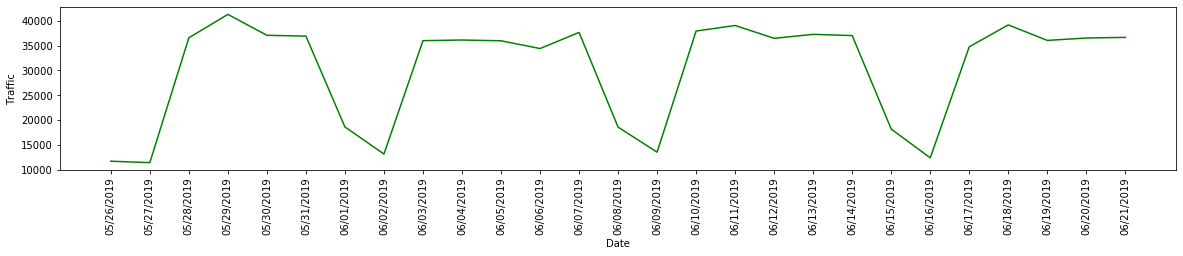

In [58]:
plt.figure(figsize=(20,3))
plt.plot(first_ave_series, c='g')
plt.xticks(rotation = 90);
plt.xlabel('Date')
plt.ylabel('Traffic')

Similar weekly trend on station and turnstile levels

***Challenge 8***

Make one list of counts for one week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts. Make the same list for another week, and another week, and another week. (hint: pandas datetime day of week may be useful)
plt.plot(week_count_list) for every week_count_list you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.

In [59]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFFIC,DAILY_TRAFFIC_2
1,A002,R051,02-00-00,59 ST,05/26/2019,7073114,2396741,05/25/2019,7072456.0,2396593.0,658.0,148.0,806.0,806.0
2,A002,R051,02-00-00,59 ST,05/27/2019,7073837,2396919,05/26/2019,7073114.0,2396741.0,723.0,178.0,901.0,901.0
3,A002,R051,02-00-00,59 ST,05/28/2019,7075260,2397410,05/27/2019,7073837.0,2396919.0,1423.0,491.0,1914.0,1914.0
4,A002,R051,02-00-00,59 ST,05/29/2019,7076789,2397944,05/28/2019,7075260.0,2397410.0,1529.0,534.0,2063.0,2063.0
5,A002,R051,02-00-00,59 ST,05/30/2019,7078273,2398445,05/29/2019,7076789.0,2397944.0,1484.0,501.0,1985.0,1985.0


Recreate DATE_TIME column but for turnstiles_daily

In [60]:
turnstiles_daily['DATE_TIME']=pd.to_datetime(turnstiles_daily.DATE)

In [61]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFFIC,DAILY_TRAFFIC_2,DATE_TIME
1,A002,R051,02-00-00,59 ST,05/26/2019,7073114,2396741,05/25/2019,7072456.0,2396593.0,658.0,148.0,806.0,806.0,2019-05-26
2,A002,R051,02-00-00,59 ST,05/27/2019,7073837,2396919,05/26/2019,7073114.0,2396741.0,723.0,178.0,901.0,901.0,2019-05-27
3,A002,R051,02-00-00,59 ST,05/28/2019,7075260,2397410,05/27/2019,7073837.0,2396919.0,1423.0,491.0,1914.0,1914.0,2019-05-28
4,A002,R051,02-00-00,59 ST,05/29/2019,7076789,2397944,05/28/2019,7075260.0,2397410.0,1529.0,534.0,2063.0,2063.0,2019-05-29
5,A002,R051,02-00-00,59 ST,05/30/2019,7078273,2398445,05/29/2019,7076789.0,2397944.0,1484.0,501.0,1985.0,1985.0,2019-05-30


In [62]:
turnstiles_daily['DAY_OF_WEEK']=turnstiles_daily.DATE_TIME.dt.dayofweek
turnstiles_daily

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DAILY_EXITS,DAILY_TRAFFIC,DAILY_TRAFFIC_2,DATE_TIME,DAY_OF_WEEK
1,A002,R051,02-00-00,59 ST,05/26/2019,7073114,2396741,05/25/2019,7072456.0,2396593.0,658.0,148.0,806.0,806.0,2019-05-26,6
2,A002,R051,02-00-00,59 ST,05/27/2019,7073837,2396919,05/26/2019,7073114.0,2396741.0,723.0,178.0,901.0,901.0,2019-05-27,0
3,A002,R051,02-00-00,59 ST,05/28/2019,7075260,2397410,05/27/2019,7073837.0,2396919.0,1423.0,491.0,1914.0,1914.0,2019-05-28,1
4,A002,R051,02-00-00,59 ST,05/29/2019,7076789,2397944,05/28/2019,7075260.0,2397410.0,1529.0,534.0,2063.0,2063.0,2019-05-29,2
5,A002,R051,02-00-00,59 ST,05/30/2019,7078273,2398445,05/29/2019,7076789.0,2397944.0,1484.0,501.0,1985.0,1985.0,2019-05-30,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136023,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/17/2019,5554,379,06/16/2019,5554.0,379.0,0.0,0.0,0.0,0.0,2019-06-17,0
136024,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/18/2019,5554,379,06/17/2019,5554.0,379.0,0.0,0.0,0.0,0.0,2019-06-18,1
136025,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/19/2019,5554,379,06/18/2019,5554.0,379.0,0.0,0.0,0.0,0.0,2019-06-19,2
136026,TRAM2,R469,00-05-01,RIT-ROOSEVELT,06/20/2019,5554,379,06/19/2019,5554.0,379.0,0.0,0.0,0.0,0.0,2019-06-20,3


In [64]:
def count_weeks(station_name, monday_date):
    """
    Returns a list representing the daily traffic at station_name starting on the given Monday, and proceeding for one
    full week
    """
    result_list = []
    days_of_the_week = [0,1,2,3,4,5,6]
    for i, day in enumerate(days_of_the_week):
        mask = (
                (turnstiles_daily["DATE_TIME"] == monday_date + timedelta(days=i)) &
                (turnstiles_daily["STATION"] == station_name) &
                (turnstiles_daily["DAY_OF_WEEK"] == day))
        result_list.append(turnstiles_daily[mask].groupby(['STATION','DATE_TIME']).DAILY_TRAFFIC_2.sum().tolist().pop())
    return result_list

In [65]:
# Testing count_weeks()
print(count_weeks("59 ST", pd.Timestamp(2019,5,27)))

[54427.0, 112790.22077922078, 112415.55194805194, 113144.55194805194, 111322.55194805194, 82538.0, 65884.0]


In [66]:
def multiple_weeks(number, station):
    """
    Returns a list (number long) of count_weeks output lists for station
    """
    list_of_lists=[]
    monday = pd.Timestamp(2019,5,27)
    for i in range(number):
        list_of_lists.append(count_weeks(station, monday))
        monday += timedelta(days=7)
    return list_of_lists

In [67]:
list_of_weeks = multiple_weeks(3, 'TIMES SQ-42 ST')   
list_of_weeks

[[96249.0, 186473.0, 207227.0, 205781.0, 198419.0, 134563.0, 110681.0],
 [189101.0, 205247.0, 213727.0, 212221.0, 207347.0, 136840.0, 115282.0],
 [182325.0,
  199277.0,
  214830.06222222222,
  207381.0,
  203324.0,
  127724.0,
  102498.0]]

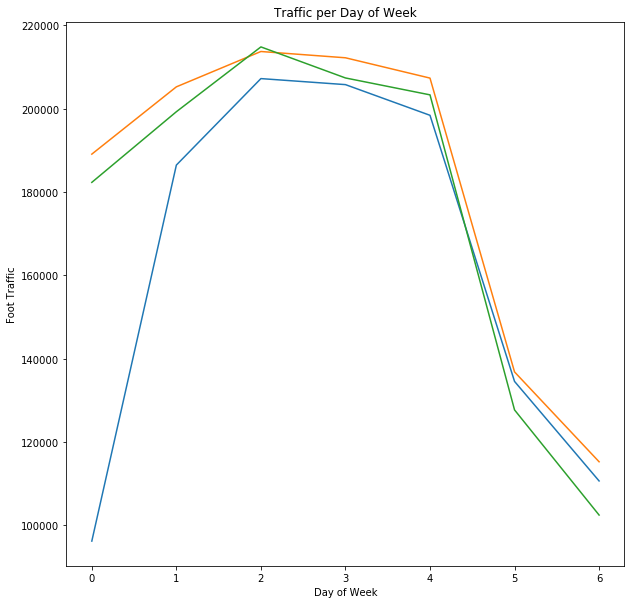

In [68]:
# Plot three lines representing three weeks of daily traffic sums
plt.figure(figsize=(10,10))
plt.title('Traffic per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Foot Traffic')
for i, week in enumerate(list_of_weeks):
    plt.plot(list_of_weeks[i])

***Challenge 9***

Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate

In [70]:
station_totals=turnstiles_daily.groupby('STATION').DAILY_TRAFFIC_2.sum().sort_values(ascending = False)
station_totals

STATION
34 ST-PENN STA     7.651049e+06
GRD CNTRL-42 ST    6.740592e+06
34 ST-HERALD SQ    5.308500e+06
TIMES SQ-42 ST     4.784050e+06
23 ST              4.613030e+06
                       ...     
BEACH 98 ST        2.760684e+04
TOMPKINSVILLE      1.812400e+04
BEACH 105 ST       1.470769e+04
BROAD CHANNEL      9.771444e+03
ORCHARD BEACH      3.255481e+02
Name: DAILY_TRAFFIC_2, Length: 378, dtype: float64

***Challenge 10***

Make a single list of these total ridership values and plot it with

plt.hist(total_ridership_counts)

to get an idea about the distribution of total ridership among different stations.

Text(0.5, 1.0, 'Histogram of total traffic per station')

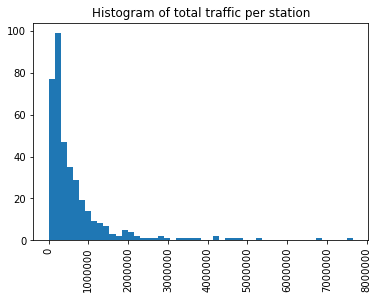

In [74]:
station_totals_list=turnstiles_daily.groupby('STATION').DAILY_TRAFFIC_2.sum().tolist()
plt.hist(station_totals_list, bins=50);
plt.xticks(rotation=90)
plt.title('Histogram of total traffic per station')

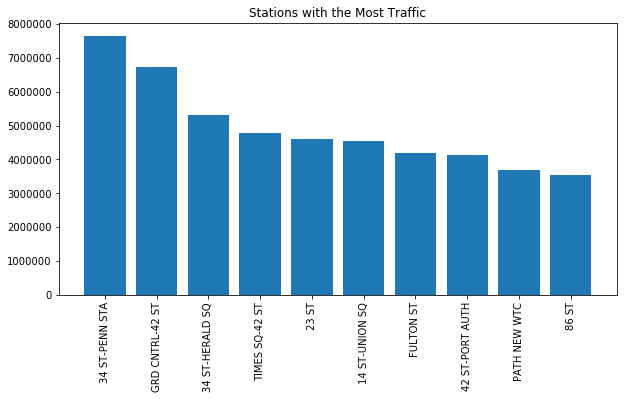

In [81]:
indices = range(len(station_totals))
indices = station_totals.index[:10]

plt.figure(figsize=(10,5))
plt.bar(indices, station_totals[:10])
plt.title('Stations with the Most Traffic')
plt.xticks(rotation = 90);

***Project Code***
Gabriel Bond
Mark Dziuban
Lusine Kamikyan

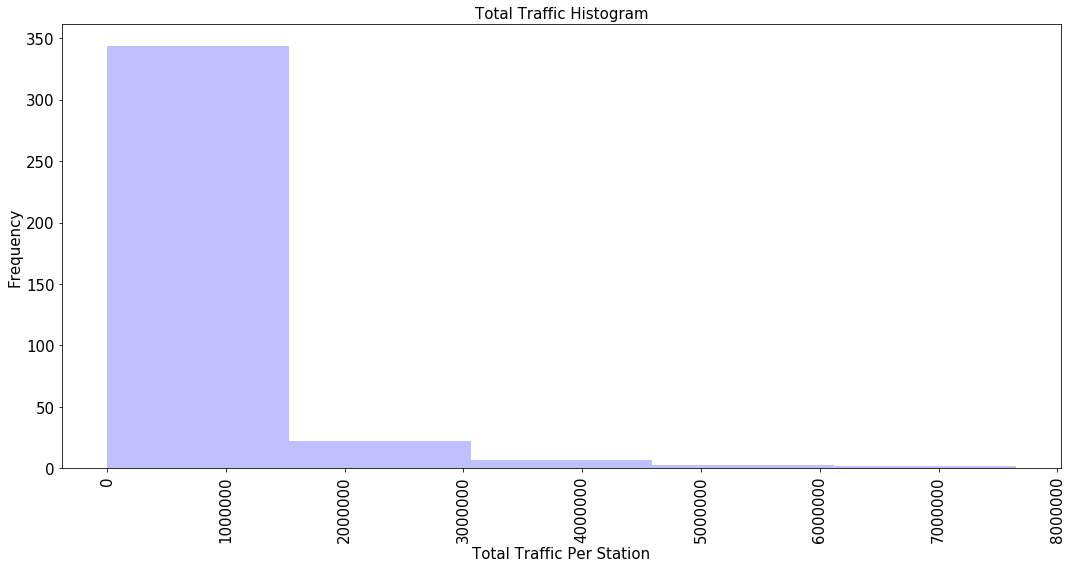

In [91]:
# Re-plot challenge 10 hist for presentation
plt.figure(figsize=(15,8))
plt.hist(station_totals_list, 5, color = 'b',alpha=0.25);
plt.title('Total Traffic Histogram', fontsize = 15)
plt.xlabel('Total Traffic Per Station', fontsize = 15)
plt.ylabel('Frequency',fontsize = 15)
plt.xticks(rotation=90)
plt.tick_params(labelsize = 15)
plt.tight_layout()
plt.savefig('Total Traffic Histogram.svg')

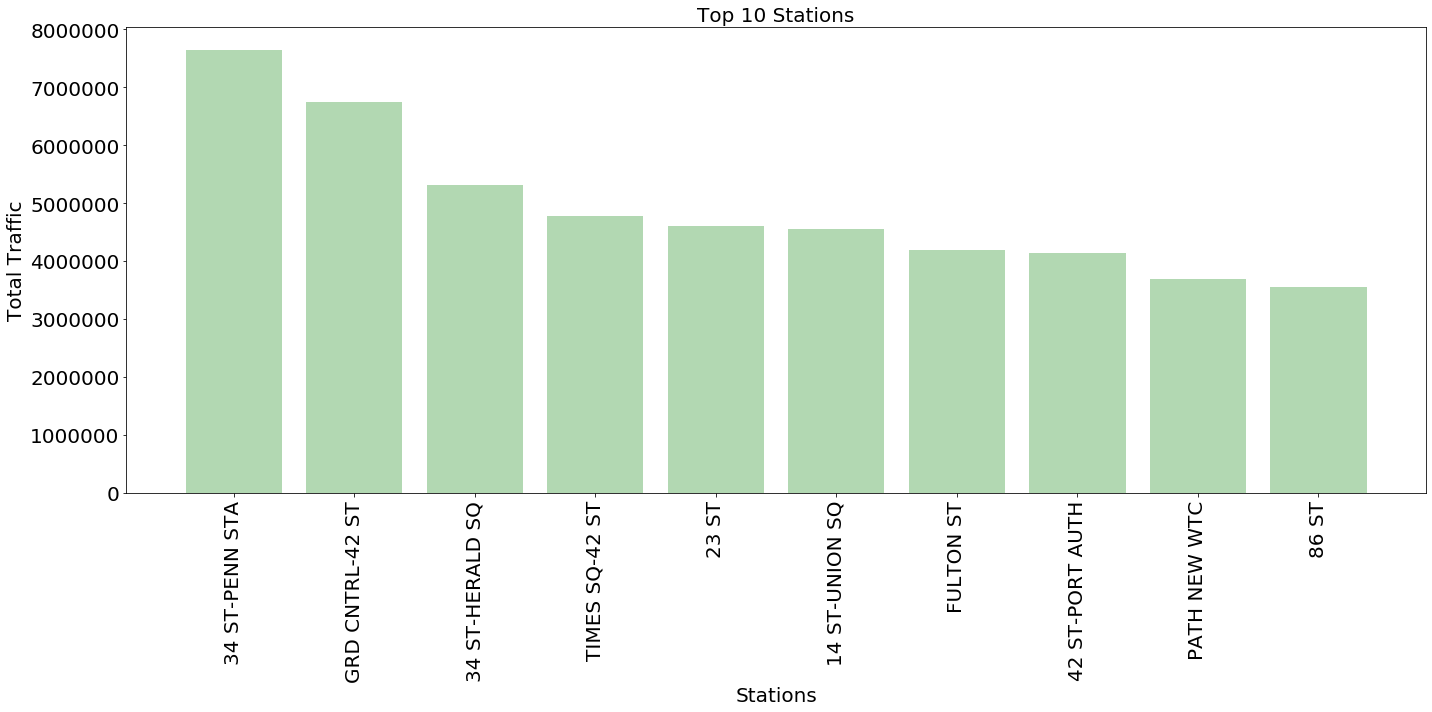

In [104]:
indices = range(len(station_totals_list))
indices = station_totals.index[:10]
plt.figure(figsize=(20,10))
plt.bar(indices, station_totals[:10], color = 'Green',alpha=0.3)
plt.xticks(rotation = 90);
plt.tick_params(labelsize = 20)
plt.title('Top 10 Stations', fontsize = 20)
plt.xlabel('Stations', fontsize = 20)
plt.ylabel('Total Traffic', fontsize = 20)
plt.tight_layout()
plt.savefig('Top 10 Stations.svg')

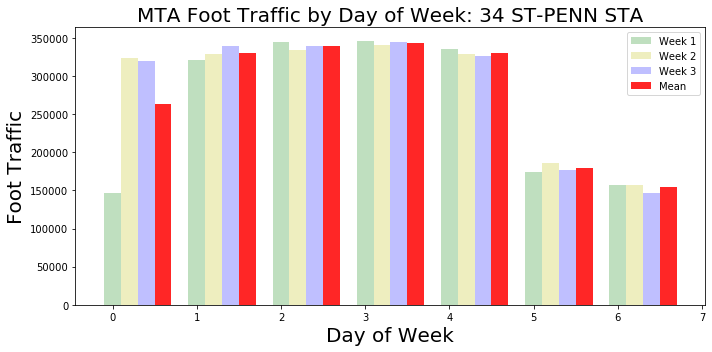

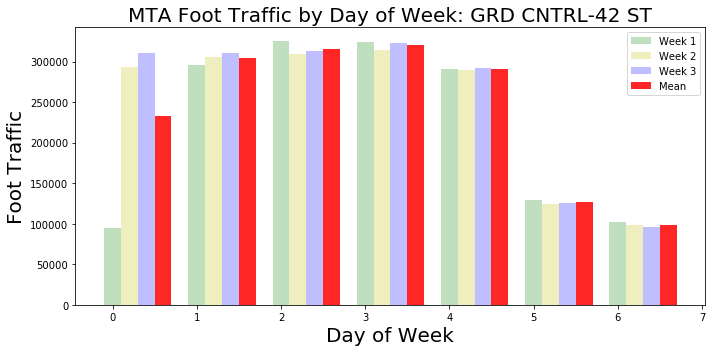

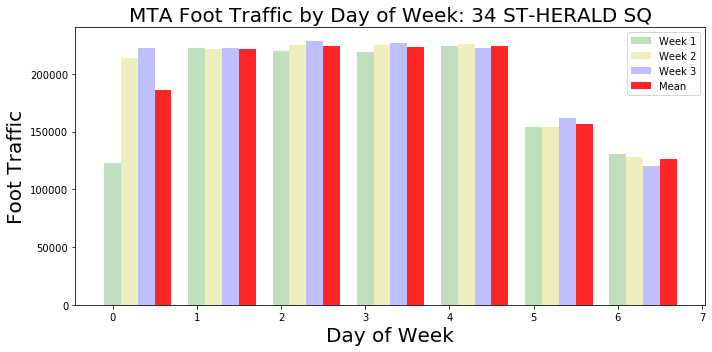

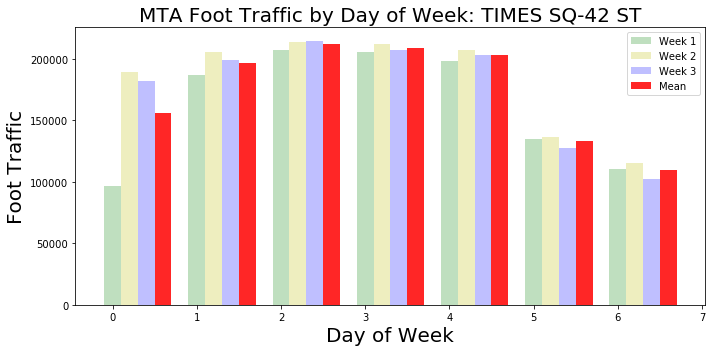

In [110]:
top_4_stations=['34 ST-PENN STA','GRD CNTRL-42 ST','34 ST-HERALD SQ','TIMES SQ-42 ST']


for i, station in enumerate(top_4_stations):
    #plt.subplot(2,2,i+1)
    
    # Use function multiple_weeks from challenge 8
    list_of_weeks = multiple_weeks(3, station)  

    # data to plot
    n_groups = 7
    week1 = list_of_weeks[0]
    week2 = list_of_weeks[1]
    week3 = list_of_weeks[2]
    week_mean=(np.array(list_of_weeks[0])+np.array(list_of_weeks[1])+np.array(list_of_weeks[2]))/3

    # create plot
    fig, ax = plt.subplots(figsize=(10,5))
    index = np.arange(n_groups)
    bar_width = 0.2
    opacity = 0.25


    rects1 = ax.bar(index, week1, bar_width,
    alpha=opacity,
    color='g',
    label='Week 1')

    rects2 = ax.bar(index + bar_width, week2, bar_width,
    alpha=opacity,
    color='y',
    label='Week 2')

    rects3 = ax.bar(index + 2*bar_width, week3, bar_width,
    alpha=opacity,
    color='b',
    label='Week 3')

    rects4 = ax.bar(index + 3*bar_width, week_mean, bar_width,
    alpha=.85,
    color='r',
    label='Mean')

    #plt.plot(week_mean, color='r')

    plt.xlabel('Day of Week', fontsize=20)
    plt.ylabel('Foot Traffic', fontsize=20)
    plt.title('MTA Foot Traffic by Day of Week: '+station, fontsize = 20)
    plt.xticklabels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    plt.legend()

    plt.tight_layout()
    plt.savefig(station+'.svg')
    plt.show()

I re-ran the previous code 4 times with the top four station names replacing 'TIMES SQ-42 ST' in the title and the call to the multiple weeks function

In [83]:
station_day = turnstiles_daily.groupby(['STATION','DAY_OF_WEEK'])['DAILY_TRAFFIC_2'].sum().reset_index()
station_day.rename(columns={'DAILY_TRAFFIC_2':'DAILY_SUMS'}, inplace=True)
station_day

,STATION,DAY_OF_WEEK,DAILY_SUMS
0,1 AV,0,120120.000000
1,1 AV,1,150835.000000
2,1 AV,2,149690.200000
3,1 AV,3,145205.933333
4,1 AV,4,148169.933333
...,...,...,...
2641,ZEREGA AV,2,22009.000000
2642,ZEREGA AV,3,19765.691358
2643,ZEREGA AV,4,20730.000000
2644,ZEREGA AV,5,8446.000000


Now to generate the heat map.

In [84]:
Top_5_Station = station_day[(station_day['STATION']=='34 ST-PENN STA')|
                            (station_day['STATION']== 'GRD CNTRL-42 ST')|
                           (station_day['STATION']== '34 ST-HERALD SQ') |
                           (station_day['STATION']== 'TIMES SQ-42 ST') |
                           (station_day['STATION']== '23 ST')]
new_df = pd.DataFrame(index = Top_5_Station.STATION.unique(),columns = Top_5_Station.DAY_OF_WEEK.unique())
new_df

,0,1,2,3,4,5,6
23 ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34 ST-HERALD SQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34 ST-PENN STA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GRD CNTRL-42 ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TIMES SQ-42 ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
# Make sure no single day of the week is over or under-represented
station_day.groupby('DAY_OF_WEEK').count()

,STATION,DAILY_SUMS
DAY_OF_WEEK,,
0,378,378
1,378,378
2,378,378
3,378,378
4,378,378
5,378,378
6,378,378


In [87]:
heatmap_df=station_day[(station_day['STATION']=='34 ST-PENN STA')|
                            (station_day['STATION']== 'GRD CNTRL-42 ST')|
                           (station_day['STATION']== '34 ST-HERALD SQ') |
                           (station_day['STATION']== 'TIMES SQ-42 ST') |
                           (station_day['STATION']== '23 ST')].pivot_table(index='STATION', columns='DAY_OF_WEEK', values='DAILY_SUMS')

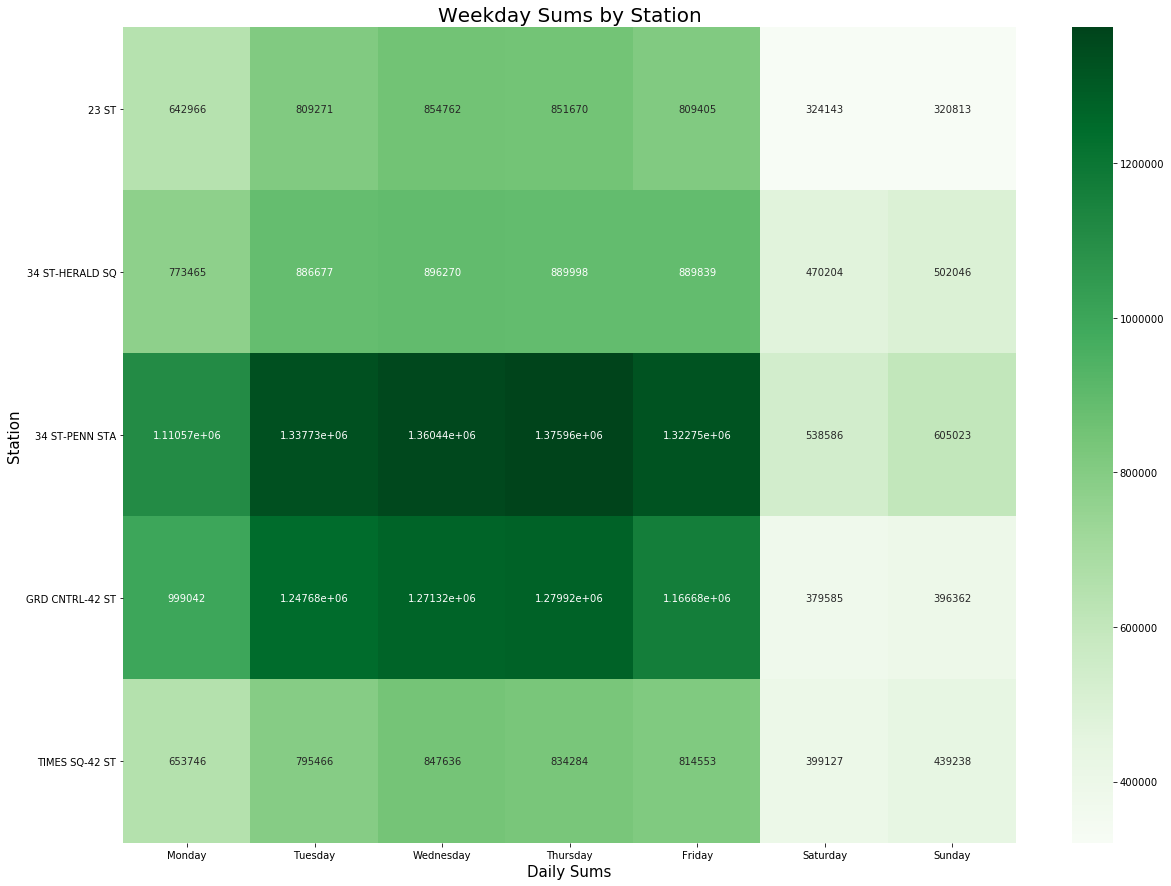

In [89]:
import seaborn as sns
cmap = sns.cm.rocket_r
plt.rcParams['figure.figsize']=(20,15)
h = sns.heatmap(heatmap_df, cmap="Greens", annot=True, fmt='g')
plt.title('Weekday Sums by Station', fontsize=20)
plt.yticks(rotation=0)
h.set(xticklabels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xlabel('Daily Sums', fontsize=15)
plt.ylabel('Station', fontsize=15)
plt.savefig('heatmap.svg')